<a href="https://colab.research.google.com/github/Yodeman/ML_practice/blob/master/mnist_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 5.6MB/s 
     |████████████████████████████████| 51kB 4.6MB/s 
     |████████████████████████████████| 194kB 24.5MB/s 
     |████████████████████████████████| 1.2MB 42.3MB/s 
     |████████████████████████████████| 61kB 7.0MB/s 
Mounted at /content/gdrive


In [2]:
from fastai.vision import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

In [3]:
path = untar_data(URLs.MNIST_SAMPLE)

In [4]:
Path.BASE_PATH = path

In [15]:
path.ls()

(#3) [Path('valid'),Path('train'),Path('labels.csv')]

In [17]:
(path/'train').ls()

(#2) [Path('train/7'),Path('train/3')]

In [5]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png')...]

In [19]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [20]:
tensor(im3)[4:10, 4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [21]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15, 4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [6]:
three_tensors = [tensor(Image.open(o)) for o in threes]
seven_tensors = [tensor(Image.open(o)) for o in sevens]
len(three_tensors), len(seven_tensors)

(6131, 6265)

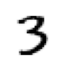

In [24]:
show_image(three_tensors[1])

In [7]:
stacked_threes = torch.stack(three_tensors).float()/255
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_sevens.shape

torch.Size([6265, 28, 28])

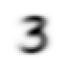

In [8]:
mean3 = stacked_threes.mean(0)
show_image(mean3)

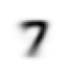

In [9]:
mean7 = stacked_sevens.mean(0)
show_image(mean7)

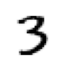

In [10]:
a_3 = stacked_threes[1]
show_image(a_3)

In [11]:
dist_3_abs = (a_3 - mean3).abs().mean()
dist_3_sqrt = (a_3 - mean3).abs().mean().sqrt()
dist_3_abs, dist_3_sqrt

(tensor(0.1114), tensor(0.3338))

In [12]:
dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqrt = (a_3 - mean7).abs().mean().sqrt()
dist_7_abs, dist_7_sqrt

(tensor(0.1586), tensor(0.3983))

In [13]:
valid_3_tens = torch.stack(
    [tensor(Image.open(o)) for o in (path/'valid'/'3').ls()]
)
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack(
    [tensor(Image.open(o)) for o in (path/'valid'/'7').ls()]
)
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape, valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [15]:
def mnist_dist(a, b): return (a-b).abs().mean((-1,-2))
mnist_dist(a_3, mean3)

tensor(0.1114)

In [17]:
def is_3(x): return mnist_dist(x, mean3) < mnist_dist(x, mean7)
is_3(a_3)

tensor(True)

In [18]:
accuracy_3s = is_3(valid_3_tens).float().mean()

In [20]:
accuracy_7s = (1-is_3(valid_7_tens).float()).mean()

In [21]:
accuracy_3s, accuracy_7s

(tensor(0.9168), tensor(0.9854))

In [22]:
(accuracy_3s+accuracy_7s)/2

tensor(0.9511)

# SGD

In [23]:
def f(x): return x**2

In [24]:
xt = tensor(3.0).requires_grad_()

In [25]:
yt = f(xt)
yt

tensor(9., grad_fn=<PowBackward0>)

In [26]:
yt.backward()

In [30]:
xt.grad

tensor(6.)

In [32]:
xt = tensor([2, 3, 4]).float().requires_grad_()

In [34]:
def f(x): return sum(x**2)

In [35]:
yt = f(xt)
yt

tensor(29., grad_fn=<AddBackward0>)

In [36]:
yt.backward()

In [37]:
xt.grad

tensor([4., 6., 8.])

In [58]:
time = torch.arange(0, 20); time

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

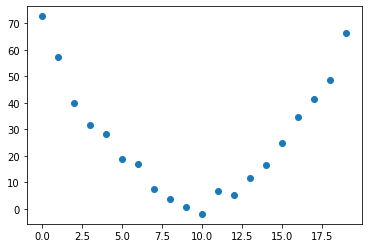

In [59]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time,speed);

In [60]:
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

In [67]:
def mse(preds, targets): return ((preds-targets)**2).mean()

In [68]:
params = torch.randn(3).requires_grad_()
orig_params = params.clone()

In [69]:
preds = f(time, params)

In [64]:
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300,100)

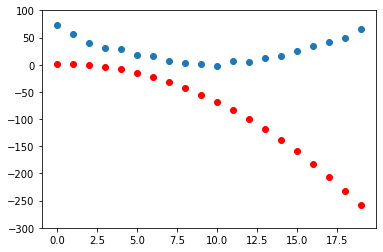

In [70]:
show_preds(preds)

In [71]:
loss = mse(preds, speed)
loss

tensor(20625.3867, grad_fn=<MeanBackward0>)

In [72]:
params

tensor([-0.7409,  0.3618,  1.9199], requires_grad=True)

In [73]:
loss.backward()
params.grad

tensor([-47434.6641,  -3037.2026,   -225.2986])

In [74]:
params.grad * 1e-5

tensor([-0.4743, -0.0304, -0.0023])

In [75]:
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

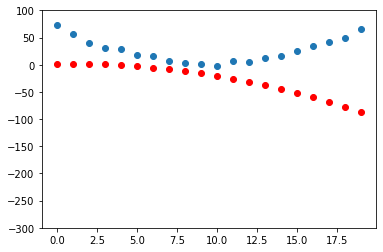

In [76]:
preds = f(time, params)
show_preds(preds)

In [77]:
mse(preds, speed)

tensor(4414.6738, grad_fn=<MeanBackward0>)

In [78]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

In [79]:
for i in range(10): apply_step(params)

4414.673828125
1347.109375
766.6297607421875
656.7825927734375
635.9934692382812
632.056884765625
631.3092041015625
631.1649780273438
631.135009765625
631.1266479492188


In [80]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)
train_y = tensor([1]*len(threes)+[0]*len(sevens)).unsqueeze(1)
train_x.shape, train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [81]:
dset = list(zip(train_x, train_y))

In [82]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

In [83]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

In [84]:
weights = init_params((784, 1))
b = init_params(1)

In [85]:
def linear1(x): return x@weights + b

In [93]:
def mnist_loss(predictions, target):
    predictions = predictions.sigmoid()
    return torch.where(target==1, 1-predictions, predictions).mean()

In [87]:
dl = DataLoader(dset, batch_size=256)
valid_dl = DataLoader(valid_dset, batch_size=256)

In [88]:
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

In [89]:
def train_epoch(model, lr, params):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad*lr
            p.grad.zero_()

In [90]:
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

In [91]:
def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

In [96]:
lr = 1.
params = weights,b

In [97]:
for i in range(20):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end=' ')

0.7481 0.8042 0.893 0.9286 0.9408 0.9486 0.9564 0.9584 0.9608 0.9637 0.9647 0.9647 0.9662 0.9662 0.9667 0.9681 0.9686 0.9701 0.9706 0.9716 

In [98]:
def train_epoch(model):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()

In [99]:
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end=' ')

In [100]:
linear = nn.Linear(28*28, 1)
opt = SGD(linear.parameters(), lr)
train_model(linear, 20)

0.4932 0.8725 0.8232 0.9111 0.9331 0.9468 0.9555 0.9624 0.9653 0.9682 0.9697 0.9717 0.9741 0.9751 0.9761 0.9765 0.9775 0.9775 0.9785 0.9785 

In [104]:
dls = DataLoaders(dl, valid_dl)
learn = Learner(dls, nn.Linear(28*28, 1),
                loss_func=mnist_loss, opt_func=SGD,
                metrics=batch_accuracy)

In [105]:
learn.fit(20, lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.636899,0.503707,0.495584,00:00
1,0.628968,0.345020,0.614818,00:00
2,0.230670,0.317430,0.676644,00:00
3,0.099692,0.143557,0.875368,00:00
4,0.050761,0.093813,0.919529,00:00
5,0.031760,0.071363,0.937684,00:00
6,0.023938,0.058494,0.952404,00:00
7,0.020492,0.050276,0.957802,00:00
8,0.018796,0.044697,0.963199,00:00
9,0.017820,0.040702,0.965653,00:00


In [108]:
model = nn.Sequential(
    nn.Linear(28*28, 30),
    nn.ReLU(),
    nn.Linear(30, 1)
)
learn = Learner(dls, model=model, loss_func=mnist_loss,
                opt_func=SGD, metrics=batch_accuracy)
learn.fit(40, 0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.276145,0.416345,0.504416,00:00
1,0.133693,0.213449,0.820412,00:00
2,0.075664,0.109587,0.921001,00:00
3,0.050835,0.075134,0.944553,00:00
4,0.039183,0.059144,0.960255,00:00
5,0.033140,0.050131,0.964181,00:00
6,0.029606,0.044436,0.967125,00:00
7,0.027271,0.040526,0.966634,00:00
8,0.025569,0.037660,0.968106,00:00
9,0.024241,0.035457,0.969578,00:00


In [110]:
dls = ImageDataLoaders.from_folder(path)
learn = cnn_learner(dls, resnet18, pretrained=False, loss_func=F.cross_entropy,
                    metrics=accuracy)
learn.fit_one_cycle(1, 0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.087875,0.010553,0.996075,03:07
